## Rantaviivan vaikutus mökin hintaan - esimerkki

In [1]:
# Lähteenä käytetty monistetta:
# http://myy.haaga-helia.fi/~taaak/m/regressio.pdf (Lineaariset regressiomallit)

# tuodaan scipy & numpy
import scipy.stats.stats as sc
import numpy as np

In [2]:
# tonttien rantaviiva
rantaviiva=([30,35,40,50,55,60,60,70,80,85])
# mökkien pinta-alat
pinta_alat=([50,42,25,30,45,24,60,34,32,28])
# myyntihinnat
myyntihinta=([95,95,80,100,135,100,210,160,150,150])

In [3]:
# lasketaan Pearsonin korrelaatiokertoimet / perform cross-correlation for all data points
print(sc.pearsonr(rantaviiva,myyntihinta))
print(sc.pearsonr(pinta_alat,myyntihinta))

(0.64133817274584626, 0.045655479428298291)
(0.48070165384419639, 0.15961285986266319)


In [4]:
# rantaviiva (0,64) korreloi enemmän kuin pinta-ala (0,48)
# Myyntihinta korreloi voimakkaammin rantaviivan kanssa, valitaan
# se selittäväksi tekijäksi.

In [5]:
# tuodaan pandas
import pandas as pd

In [6]:
# luodaan listoista dataframe
# .T kääntää akselit
#
df = pd.DataFrame([myyntihinta,
                   pinta_alat,
                   rantaviiva],
                   index=['Myyntihinta', 'Pinta alat', 'Rantaviiva']).T

In [7]:
# näytä korrelaatiot pandasilla
df.corr()

,Myyntihinta,Pinta alat,Rantaviiva
Myyntihinta,1.000000,0.480702,0.641338
Pinta alat,0.480702,1.000000,-0.305457
Rantaviiva,0.641338,-0.305457,1.000000


In [8]:
# lisätään myyntihinnan keskiarvo
df['Keskiarvo'] = df['Myyntihinta'].mean()

In [9]:
df

,Myyntihinta,Pinta alat,Rantaviiva,Keskiarvo
0,95,50,30,127.5
1,95,42,35,127.5
2,80,25,40,127.5
3,100,30,50,127.5
4,135,45,55,127.5
5,100,24,60,127.5
6,210,60,60,127.5
7,160,34,70,127.5
8,150,32,80,127.5
9,150,28,85,127.5


In [10]:
# lisätään jäännös
df['Jäännös'] = df['Myyntihinta'] - df['Keskiarvo']
df

,Myyntihinta,Pinta alat,Rantaviiva,Keskiarvo,Jäännös
0,95,50,30,127.5,-32.5
1,95,42,35,127.5,-32.5
2,80,25,40,127.5,-47.5
3,100,30,50,127.5,-27.5
4,135,45,55,127.5,7.5
5,100,24,60,127.5,-27.5
6,210,60,60,127.5,82.5
7,160,34,70,127.5,32.5
8,150,32,80,127.5,22.5
9,150,28,85,127.5,22.5


In [11]:
# tuodaan pyplot
import matplotlib.pyplot as plt

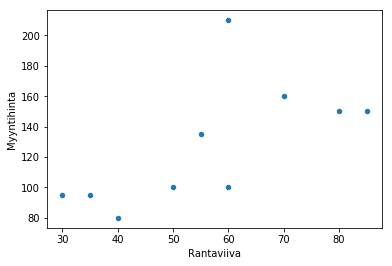

In [12]:
# näytä arvot kaaviossa
df.plot.scatter(x='Rantaviiva', y='Myyntihinta')
plt.show()

In [13]:
# Pienimmän neliösumman keino  /  Least Squares Method
#
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [14]:
# linregress = lineaarinen regressio kahdella arvosarjalla
slope, intercept, r_value, p_value, std_err = sc.linregress(df.Rantaviiva, df.Myyntihinta)

In [15]:
# Kulmakerroin, leikkauspiste, korrelaatiokerroin
# p-arvo/todennäköisyys, keskivirhe
#
# Slope, intercept, correlation coefficient
# p-value/propability value, standard error

slope, intercept, r_value, p_value, std_err

(1.4127764127764129,
 47.67813267813267,
 0.64133817274584626,
 0.045655479428298264,
 0.59756199051672287)

In [16]:
# Selitysaste/selityskerroin
# Coefficient of determination (r_squared)
r_value**2

0.41131465182098093

In [17]:
y = df.Myyntihinta
x = df.Rantaviiva

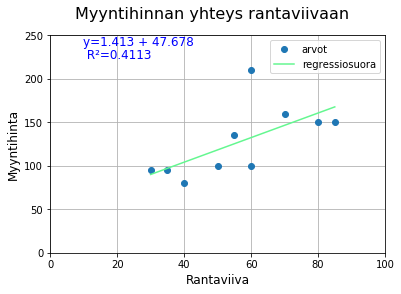

In [18]:
### lasketaan lineaarinen regressio

# otsikko
fig = plt.figure()
fig.suptitle('Myyntihinnan yhteys rantaviivaan', fontsize=16)

# lukualueiden määrittely (voidaan jättää pois)
plt.axis([0.0,100.0, 0.0,250.0])

# lisää akselien otsikot
plt.ylabel('Myyntihinta', fontsize=12)
plt.xlabel('Rantaviiva', fontsize=12)

# selittävää tekstiä = regressiosuoran yhtälö + selityskerroin
texttitle = ('y=%.3f + %.3f \n R²=%.4f' % (slope,intercept,r_value**2))
fig.text(0.2, 0.8, texttitle, color = 'b', visible = True, 
         linespacing = 1, weight = 'normal', size = 'large')


# arvojen mukaiset pisteet
plt.plot(x, y, 'o', label='arvot')

# värimääritys 
viher = (100/255,247/255,144/255)

# lineaarinen regressio
plt.plot(x, intercept + slope*x, 'r', label='regressiosuora', c=viher)

# lisää otsikot
plt.legend()

# lisätään taustalle verkko
plt.grid()

# näytä kaavio
plt.show()

In [19]:
# lisätään jäännösneliö
df['Jäännösneliö'] = df['Jäännös']**2
df

,Myyntihinta,Pinta alat,Rantaviiva,Keskiarvo,Jäännös,Jäännösneliö
0,95,50,30,127.5,-32.5,1056.25
1,95,42,35,127.5,-32.5,1056.25
2,80,25,40,127.5,-47.5,2256.25
3,100,30,50,127.5,-27.5,756.25
4,135,45,55,127.5,7.5,56.25
5,100,24,60,127.5,-27.5,756.25
6,210,60,60,127.5,82.5,6806.25
7,160,34,70,127.5,32.5,1056.25
8,150,32,80,127.5,22.5,506.25
9,150,28,85,127.5,22.5,506.25


In [20]:
# jäännösneliösumma
jaannos_nelio_summa = df['Jäännösneliö'].sum()
jaannos_nelio_summa

14812.5

### Lineaarinen regressio Seabornilla

In [21]:
# tuodaan seaborn -kirjasto
import seaborn as sns

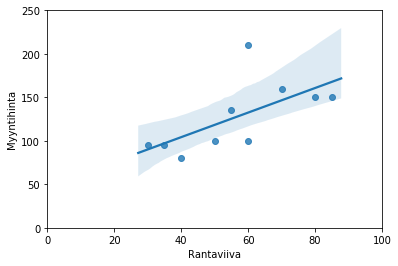

In [22]:
a = sns.regplot('Rantaviiva', # Horizontal axis
           'Myyntihinta',    # Vertical axis
           data=df)

a.set(ylim=(0, 250), xlim=(0,100)) # arvoalue   #,xlabel='common xlabel', ylabel='common ylabel') # lisää akselien otsikot

# gridlines darkgrid, whitegrid, dark, white or ticks
sns.set_style("whitegrid")

plt.show()

### Lineaarisen regressiosuoran yhtälö

In [37]:
# (https://www.youtube.com/watch?v=qPUKBhHEmNI)
#
# Regressiosuoran yhtälö: y= b0 + b1*x
#
# Pienimmän neliösumman menetelmän ratkaisukaavat:
# b1 = (n*sum(xi*yi)-(sum(xi))*(sum(yi))) / n*sum(xi²)-(sum(xi)²)
# b0 = sum(y1-b1*sum(xi))/n   (= ÿ-b1*ẍ)
#
# b0 = piste, jossa suora leikkaa y-akselin
# b1 = suoran kulmakerroin (miten paljon y muuttuu kun x kasvaa yksikön)

b1 = (10 * sum(df.Rantaviiva)*sum(df.Myyntihinta) - sum(df.Rantaviiva) * sum(df.Myyntihinta)) / (10 * (sum(df.Rantaviiva**2)) - sum(df.Rantaviiva)**2)
b0 = (sum(df.Myyntihinta) - (b1 * sum(df.Rantaviiva)))/15
print (b1, b0)

212.395577396 -7915.23341523
